In [1]:
from DQL import *
from IPython.display import display, clear_output

Using TensorFlow backend.


In [2]:
env = gym.make('LunarLander-v2')
dS = env.observation_space.shape[0]
nA = env.action_space.n

params = {
    'batch_size' : 32,
    'gamma': 0.99,
    'tau': 0.001,
    'epsilon': 1,
    'epsilon_decay': 0.995,
    'lr': 0.0005,
}

agent = DQL_agent(dS, nA, 
                  batch_size = params['batch_size'], 
                  gamma = params['gamma'], 
                  tau = params['tau'],
                  epsilon = params['epsilon'], 
                  epsilon_decay = params['epsilon_decay'],
                  lr = params['lr'],
                  dumpfile = "weights/final_model3"
                )

agent.load_model("weights/final_model3.h5")

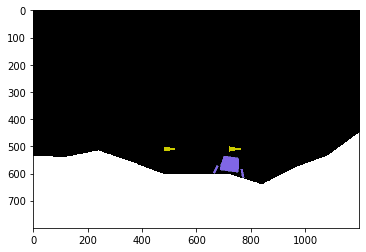

In [ ]:
def visualize(agent, env):
    img = plt.imshow(env.render(mode='rgb_array'))
    for _ in range(5):
        s = env.reset()
        done = False
        while not done:
            img.set_data(env.render(mode='rgb_array'))
            display(plt.gcf())
            clear_output(wait=True)
            #print(observation)
            a = agent.epsilon_greedy(s, 0)
            next_s, r, done, _ = env.step(a)
            if done:
                break
            s = next_s
        env.close()


visualize(agent, env)